<a href="https://colab.research.google.com/github/Kaustavee/AICTE_MICROSOFT_Internship/blob/main/EXOPLANETS_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
adityamishraml_nasaexoplanets_path = kagglehub.dataset_download('adityamishraml/nasaexoplanets')

print('Data source import complete.')


In [ ]:


import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/nasaexoplanets/cleaned_5250.csv


In [ ]:
df = pd.read_csv('/kaggle/input/nasaexoplanets/cleaned_5250.csv')

In [ ]:
df.head(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000,0.06,Radial Velocity
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000,0.08,Radial Velocity
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6505.900000,0.00,Direct Imaging
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,0.083231,0.04,Radial Velocity
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.99000,Jupiter,1.190,Jupiter,1.333000,1.239699,0.09,Radial Velocity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report



df.columns = df.columns.str.strip()


df.dropna(subset=["mass_multiplier", "radius_multiplier", "orbital_radius", "orbital_period", "eccentricity"], inplace=True)

for col in ["planet_type", "detection_method", "mass_wrt", "radius_wrt"]:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Drop name (not useful)
df.drop(columns=["name"], inplace=True)

# Fill remaining NaNs
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
regression_models = {}
regression_features = {}

classification_models = {}
classification_features = {}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def train_regression(df, target):
    features = [col for col in df.columns if col != target]
    X = df[features]
    y = df[target]

    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    print(f" Regressing {target}")
    print(f"R² Score: {r2_score(y_test, preds):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, preds, squared=False):.4f}")
    print("-" * 40)

    regression_models[target] = model
    regression_features[target] = X.columns


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_classification(df, target):
    features = [col for col in df.columns if col != target]
    X = df[features]
    y = df[target]

    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    print(f" Classifying {target}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("-" * 40)

    classification_models[target] = model
    classification_features[target] = X.columns


In [ ]:

regression_targets = ["mass_multiplier", "radius_multiplier", "orbital_radius", "orbital_period", "eccentricity", "distance"]
for target in regression_targets:
    train_regression(df, target)


classification_targets = ["planet_type", "detection_method", "mass_wrt", "radius_wrt"]
for target in classification_targets:
    train_classification(df, target)


 Regressing mass_multiplier
R² Score: 0.6103
RMSE: 4.6943
----------------------------------------
 Regressing radius_multiplier
R² Score: 0.9273
RMSE: 0.1576
----------------------------------------
 Regressing orbital_radius
R² Score: 0.8748
RMSE: 33.7779
----------------------------------------
 Regressing orbital_period
R² Score: 0.8594
RMSE: 2332.9071
----------------------------------------
 Regressing eccentricity
R² Score: 0.4359
RMSE: 0.1116
----------------------------------------
 Regressing distance
R² Score: 0.7428
RMSE: 1794.5961
----------------------------------------
 Classifying planet_type
Accuracy: 0.9807497467071935
----------------------------------------
 Classifying detection_method
Accuracy: 0.9655521783181358
----------------------------------------
 Classifying mass_wrt
Accuracy: 0.9969604863221885
----------------------------------------
 Classifying radius_wrt
Accuracy: 0.9979736575481256
----------------------------------------


In [ ]:
def predict_exoplanet(input_dict):
    print("Prediction Results:\n")


    input_df = pd.DataFrame([input_dict])


    base_row = df.copy().iloc[0:1].drop(columns=input_dict.keys(), errors='ignore')
    input_df = pd.concat([base_row, input_df], axis=1)


    for target, model in regression_models.items():
        features = regression_features[target]

        row = input_df.drop(columns=[target], errors='ignore')
        row = pd.get_dummies(row, drop_first=True)
        row = row.reindex(columns=features, fill_value=0)

        prediction = model.predict(row)[0]
        print(f" {target}: {prediction:.4f}")


    for target, model in classification_models.items():
        features = classification_features[target]

        row = input_df.drop(columns=[target], errors='ignore')
        row = pd.get_dummies(row, drop_first=True)
        row = row.reindex(columns=features, fill_value=0)

        prediction = model.predict(row)[0]
        print(f" {target}: {prediction}")


# exoplanet prediction

In [ ]:
test_planet = {
    "distance": 200.0,
    "stellar_magnitude": 6.5,
    "discovery_year": 2023,
    "eccentricity": 0.05,
    "mass_wrt": 1,
    "radius_wrt": 1,
    "detection_method": 0,
    "planet_type": 0,
    "mass_multiplier": 5.0,
    "radius_multiplier": 1.1,
    "orbital_radius": 1.5,
    "orbital_period": 1.2
}

predict_exoplanet(test_planet)


Prediction Results:

 mass_multiplier: 12.8521
 radius_multiplier: 1.1959
 orbital_radius: 1.0594
 orbital_period: 7.0733
 eccentricity: 0.2888
 distance: 1346.6900
 planet_type: 0
 detection_method: 8
 mass_wrt: 1
 radius_wrt: 1


In [ ]:
def explain_predictions(preds: dict):

    planet_type_map = {
        0: "Gas Giant",
        1: "Terrestrial (rocky planet like Earth)",
        2: "Super Earth (larger rocky planet)",
        3: "Neptune-like (ice giant)",
        4: "Brown Dwarf",
        5: "Sub-Neptune",
        6: "Unknown"
    }

    detection_method_map = {
        0: "Radial Velocity – detects wobbles in a star's movement",
        1: "Transit – planet dims star as it passes in front",
        2: "Imaging – direct observation with telescope",
        3: "Microlensing – bending of light from distant stars",
        4: "Astrometry – measuring star position shifts",
        5: "Timing Variations – changes in orbital period",
        6: "Transit Timing Variations – delays in transit pattern",
        7: "Pulsar Timing – changes in radio signal timing",
        8: "Direct Imaging – infrared or visible light image",
        9: "Gravitational Waves – theoretical"
    }

    mass_wrt_map = {
        0: "Earth",
        1: "Jupiter"
    }

    radius_wrt_map = {
        0: "Earth",
        1: "Jupiter"
    }

    print("\n Interpreted Results:\n")


    if "mass_multiplier" in preds:
        print(f" Estimated Planet Mass: {preds['mass_multiplier']:.2f} × {mass_wrt_map.get(preds.get('mass_wrt', 1), 'Unknown')}")
    if "radius_multiplier" in preds:
        print(f" Estimated Radius: {preds['radius_multiplier']:.2f} × {radius_wrt_map.get(preds.get('radius_wrt', 1), 'Unknown')}")
    if "orbital_radius" in preds:
        print(f" Orbit Radius: {preds['orbital_radius']:.2f} AU – (1 AU is the distance from Earth to Sun)")
    if "orbital_period" in preds:
        print(f" Orbital Period: {preds['orbital_period']:.2f} Earth years")
    if "eccentricity" in preds:
        ecc = preds['eccentricity']
        shape = "circular" if ecc < 0.2 else "elliptical"
        print(f" Orbit Shape (Eccentricity): {ecc:.2f} – {shape} orbit")
    if "distance" in preds:
        print(f" Distance from Earth: {preds['distance']:.2f} light-years")


    if "planet_type" in preds:
        print(f" Planet Type: {planet_type_map.get(preds['planet_type'], 'Unknown')}")
    if "detection_method" in preds:
        print(f" Detection Method: {detection_method_map.get(preds['detection_method'], 'Unknown')}")


In [ ]:
preds = {
    "mass_multiplier": 12.8521,
    "radius_multiplier": 1.1959,
    "orbital_radius": 1.0594,
    "orbital_period": 7.0733,
    "eccentricity": 0.2888,
    "distance": 1346.6900,
    "planet_type": 0,
    "detection_method": 8,
    "mass_wrt": 1,
    "radius_wrt": 1
}

explain_predictions(preds)



 Interpreted Results:

 Estimated Planet Mass: 12.85 × Jupiter
 Estimated Radius: 1.20 × Jupiter
 Orbit Radius: 1.06 AU – (1 AU is the distance from Earth to Sun)
 Orbital Period: 7.07 Earth years
 Orbit Shape (Eccentricity): 0.29 – elliptical orbit
 Distance from Earth: 1346.69 light-years
 Planet Type: Gas Giant
 Detection Method: Direct Imaging – infrared or visible light image


# Exploratory Data Analysis (EDA) Visualizations

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


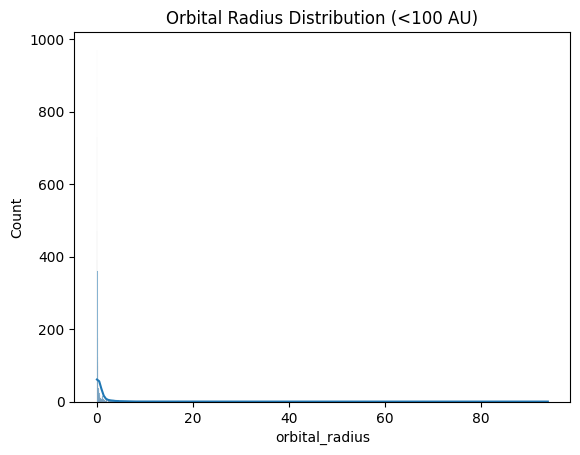

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['orbital_radius'])
df_cleaned = df_cleaned[df_cleaned['orbital_radius'] < 100]  # remove extreme outliers

sns.histplot(df_cleaned['orbital_radius'], kde=True)
plt.title("Orbital Radius Distribution (<100 AU)")
plt.show()


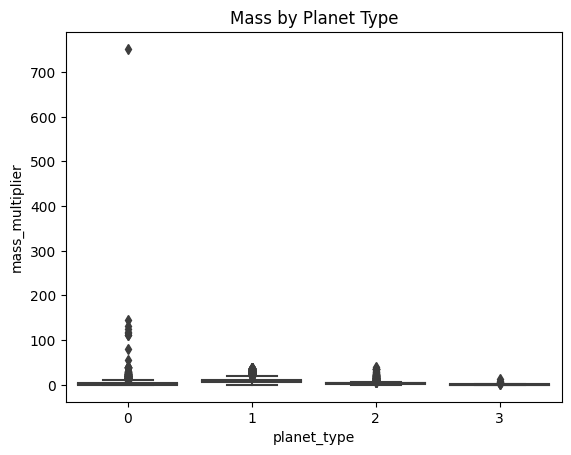

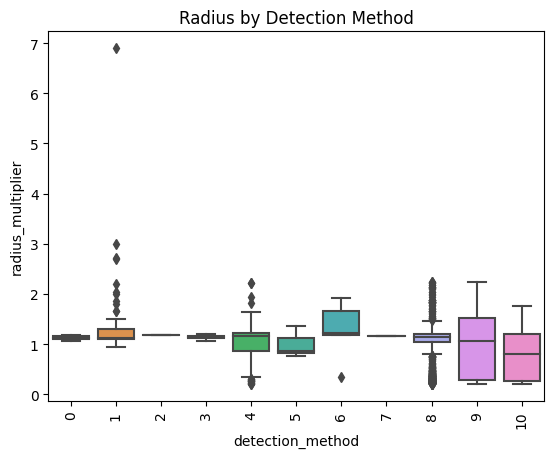

In [ ]:
sns.boxplot(x='planet_type', y='mass_multiplier', data=df)
plt.title("Mass by Planet Type")
plt.show()

sns.boxplot(x='detection_method', y='radius_multiplier', data=df)
plt.xticks(rotation=90)
plt.title("Radius by Detection Method")
plt.show()


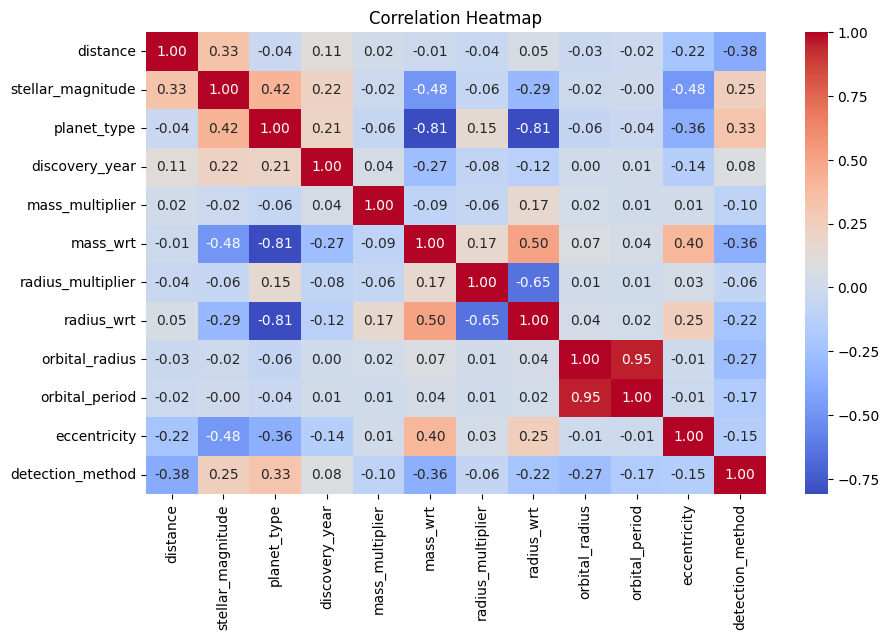

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


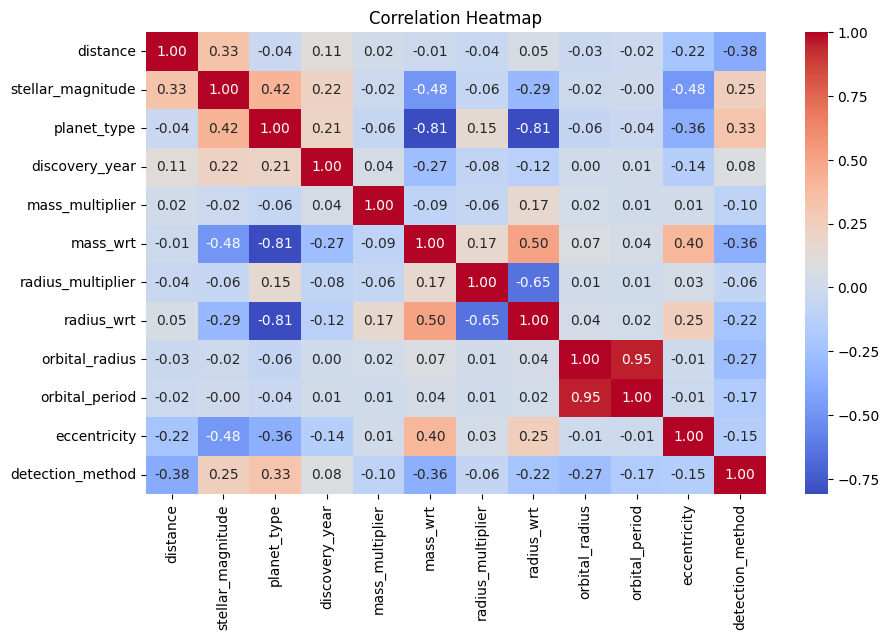

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Model Performance Visualizations

In [ ]:
def train_regression(df, target):
    features = [col for col in df.columns if col != target]
    X = df[features]
    y = df[target]

    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    print(f" Regressing {target}")
    print(f"R² Score: {r2_score(y_test, preds):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, preds, squared=False):.4f}")
    print("-" * 40)

    regression_models[target] = model
    regression_features[target] = X.columns

    return y_test, preds


In [ ]:
y_test_mass, y_pred_mass = train_regression(df, "mass_multiplier")


 Regressing mass_multiplier
R² Score: 0.6103
RMSE: 4.6943
----------------------------------------


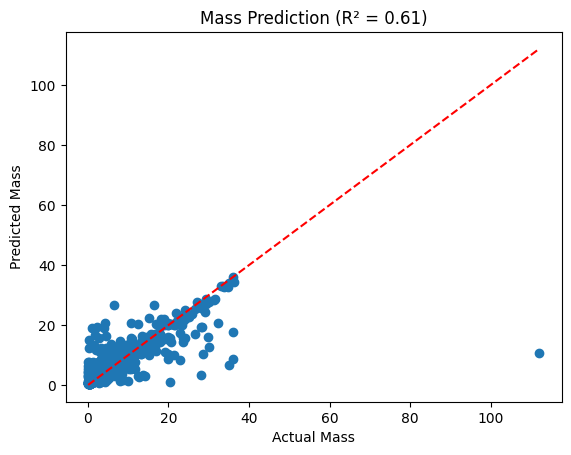

In [ ]:
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
# Example for mass
plt.scatter(y_test_mass, y_pred_mass)
plt.plot([y_test_mass.min(), y_test_mass.max()], [y_test_mass.min(), y_test_mass.max()], '--r')
plt.xlabel("Actual Mass")
plt.ylabel("Predicted Mass")
plt.title(f"Mass Prediction (R² = {r2_score(y_test_mass, y_pred_mass):.2f})")
plt.show()


In [ ]:
y_test_radius, y_pred_radius = train_regression(df, "radius_multiplier")

 Regressing radius_multiplier
R² Score: 0.9273
RMSE: 0.1576
----------------------------------------


Accuracy: 0.9979736575481256


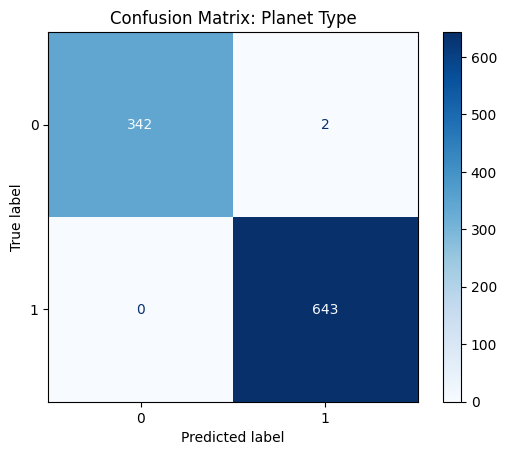

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


features = [col for col in df.columns if col != target]


X = pd.get_dummies(df[features], drop_first=True)
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Planet Type")
plt.show()


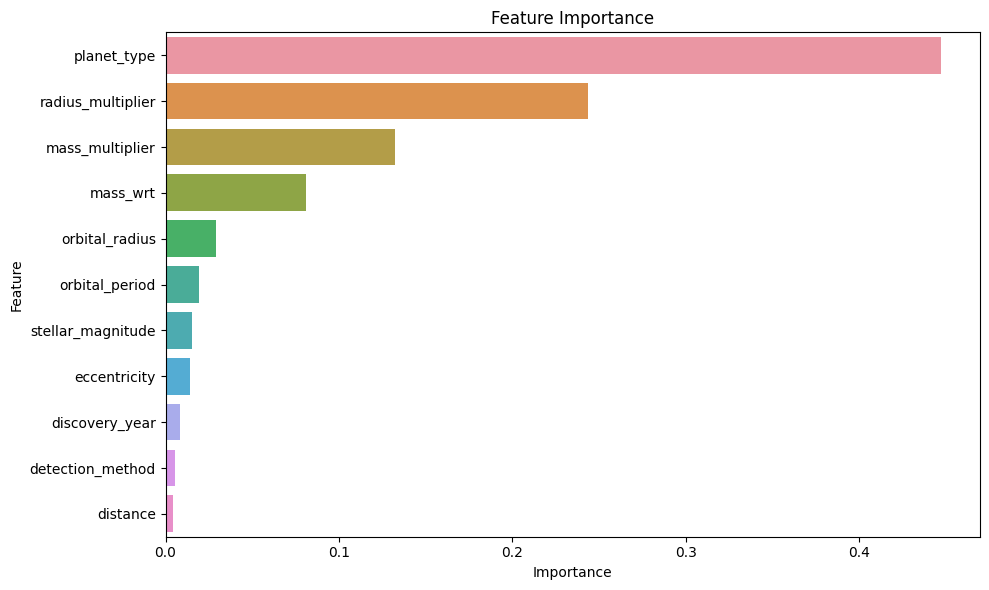

In [ ]:
importances = clf.feature_importances_
features = X_train.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


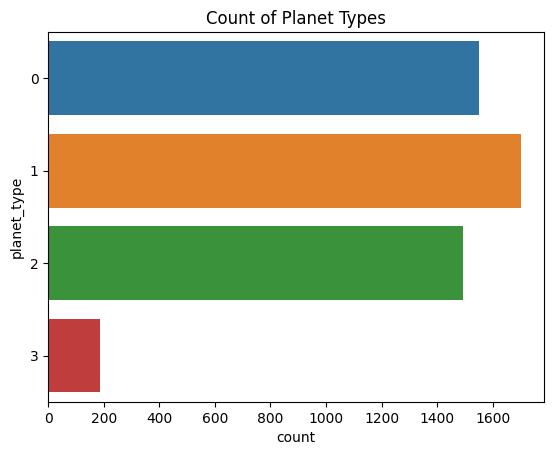

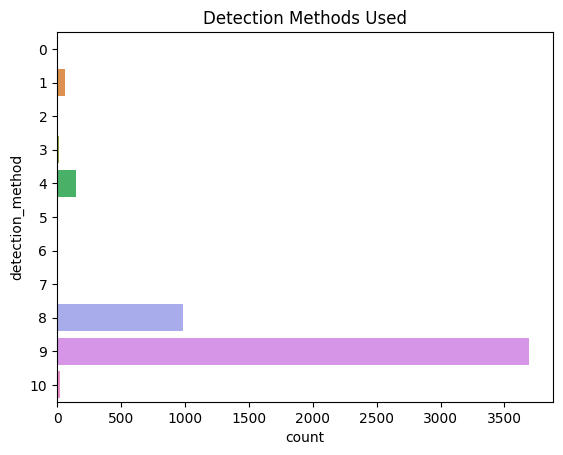

In [ ]:
sns.countplot(y='planet_type', data=df)
plt.title("Count of Planet Types")
plt.show()

sns.countplot(y='detection_method', data=df)
plt.title("Detection Methods Used")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


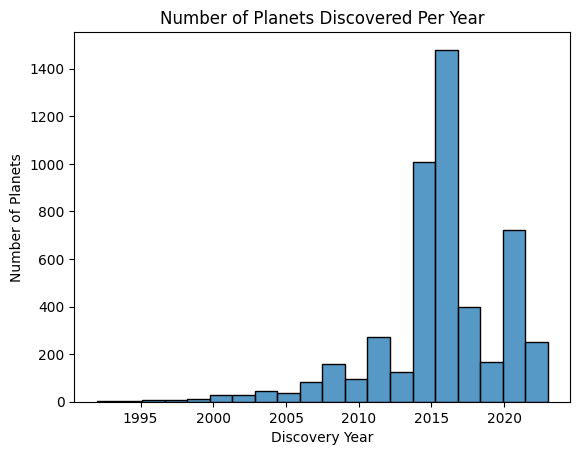

In [ ]:
sns.histplot(df['discovery_year'], bins=20)
plt.title("Number of Planets Discovered Per Year")
plt.xlabel("Discovery Year")
plt.ylabel("Number of Planets")
plt.show()


# 3D Scatter Plot (Orbital Radius, Mass, Eccentricity)



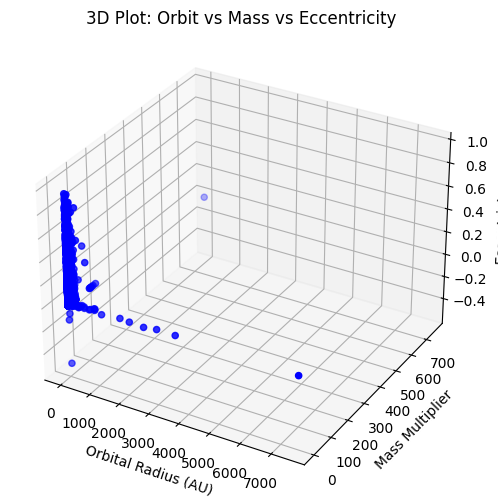

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['orbital_radius'], df['mass_multiplier'], df['eccentricity'], c='blue')
ax.set_xlabel("Orbital Radius (AU)")
ax.set_ylabel("Mass Multiplier")
ax.set_zlabel("Eccentricity")
plt.title("3D Plot: Orbit vs Mass vs Eccentricity")
plt.show()
